In [1]:
import numpy as np
import torch
from trixi.util import Config
import pickle
import matplotlib.pyplot as plt
from experiment import MNISTexperiment, BaselineExperiment, ToyDataset, coloredMNISTexperiment
from util import plot_dependency_map

%load_ext autoreload
%autoreload 2


# Explore the data
Let's plot a few data examples...


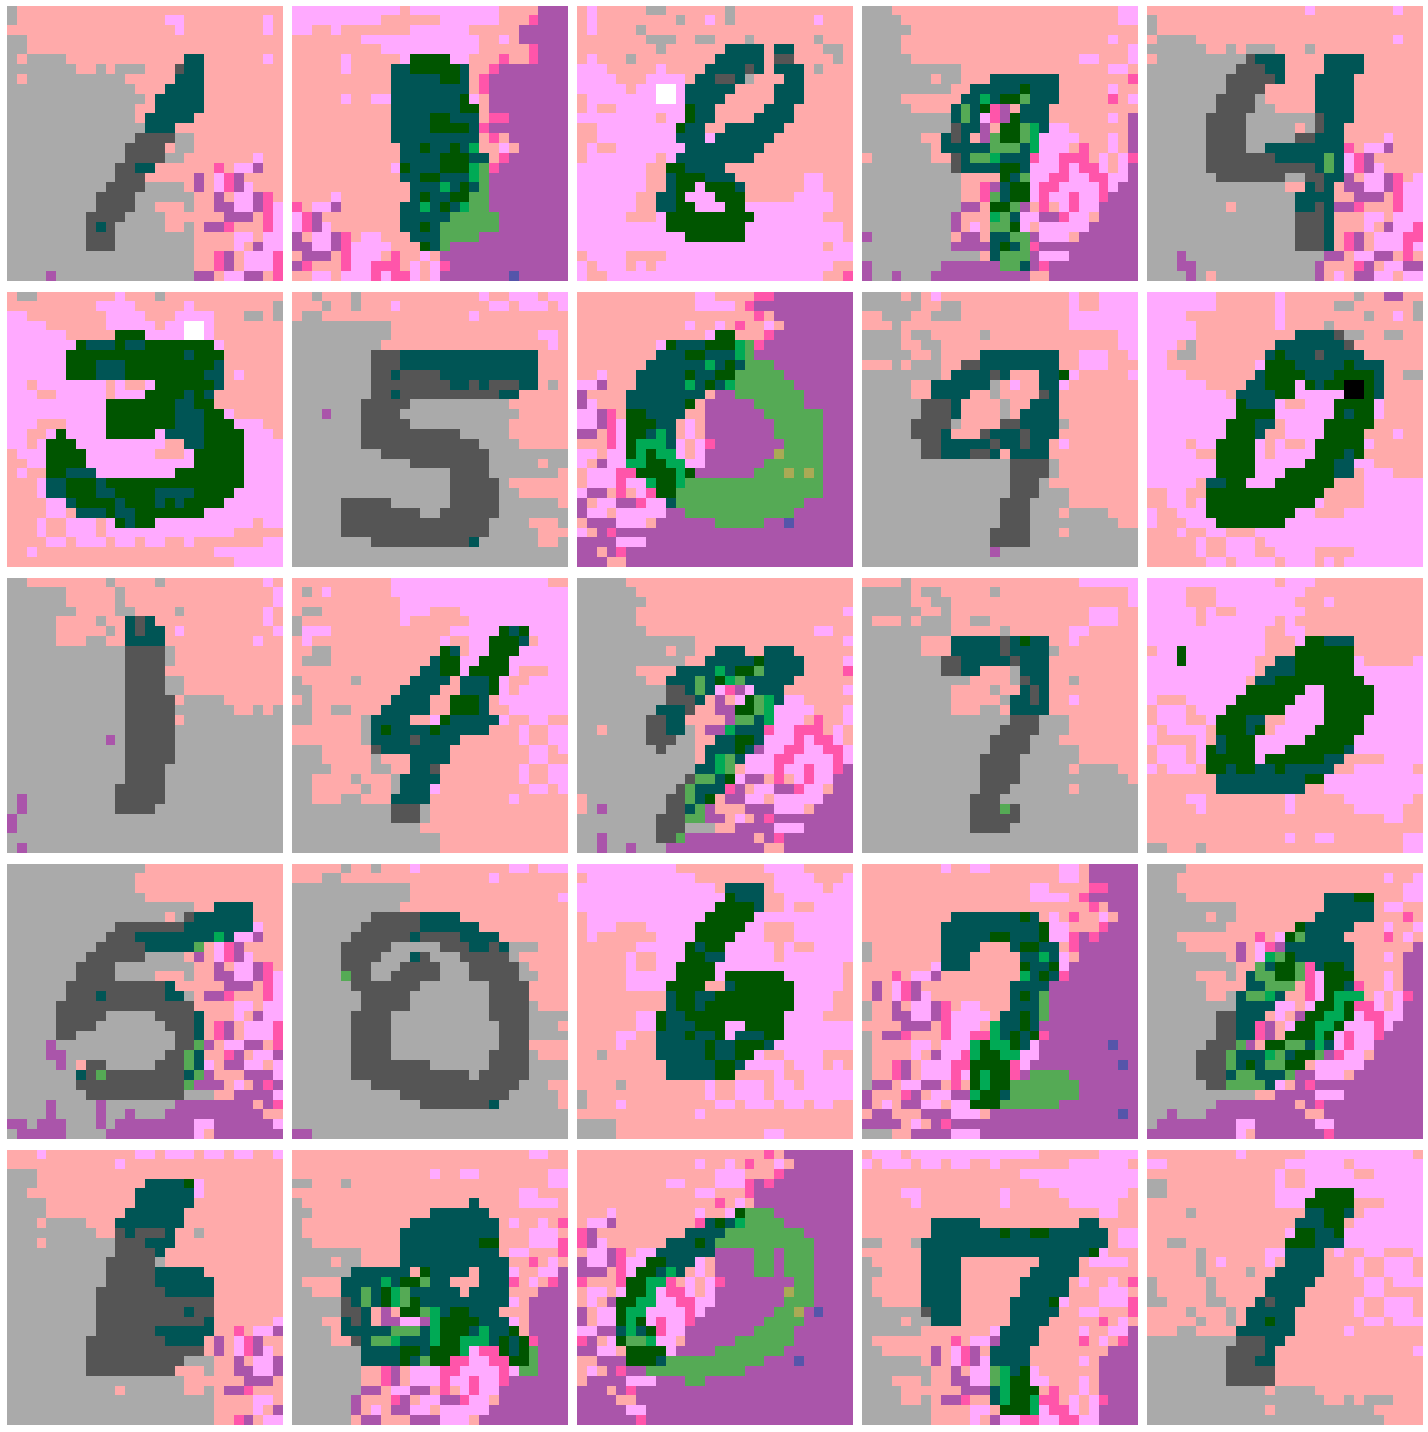

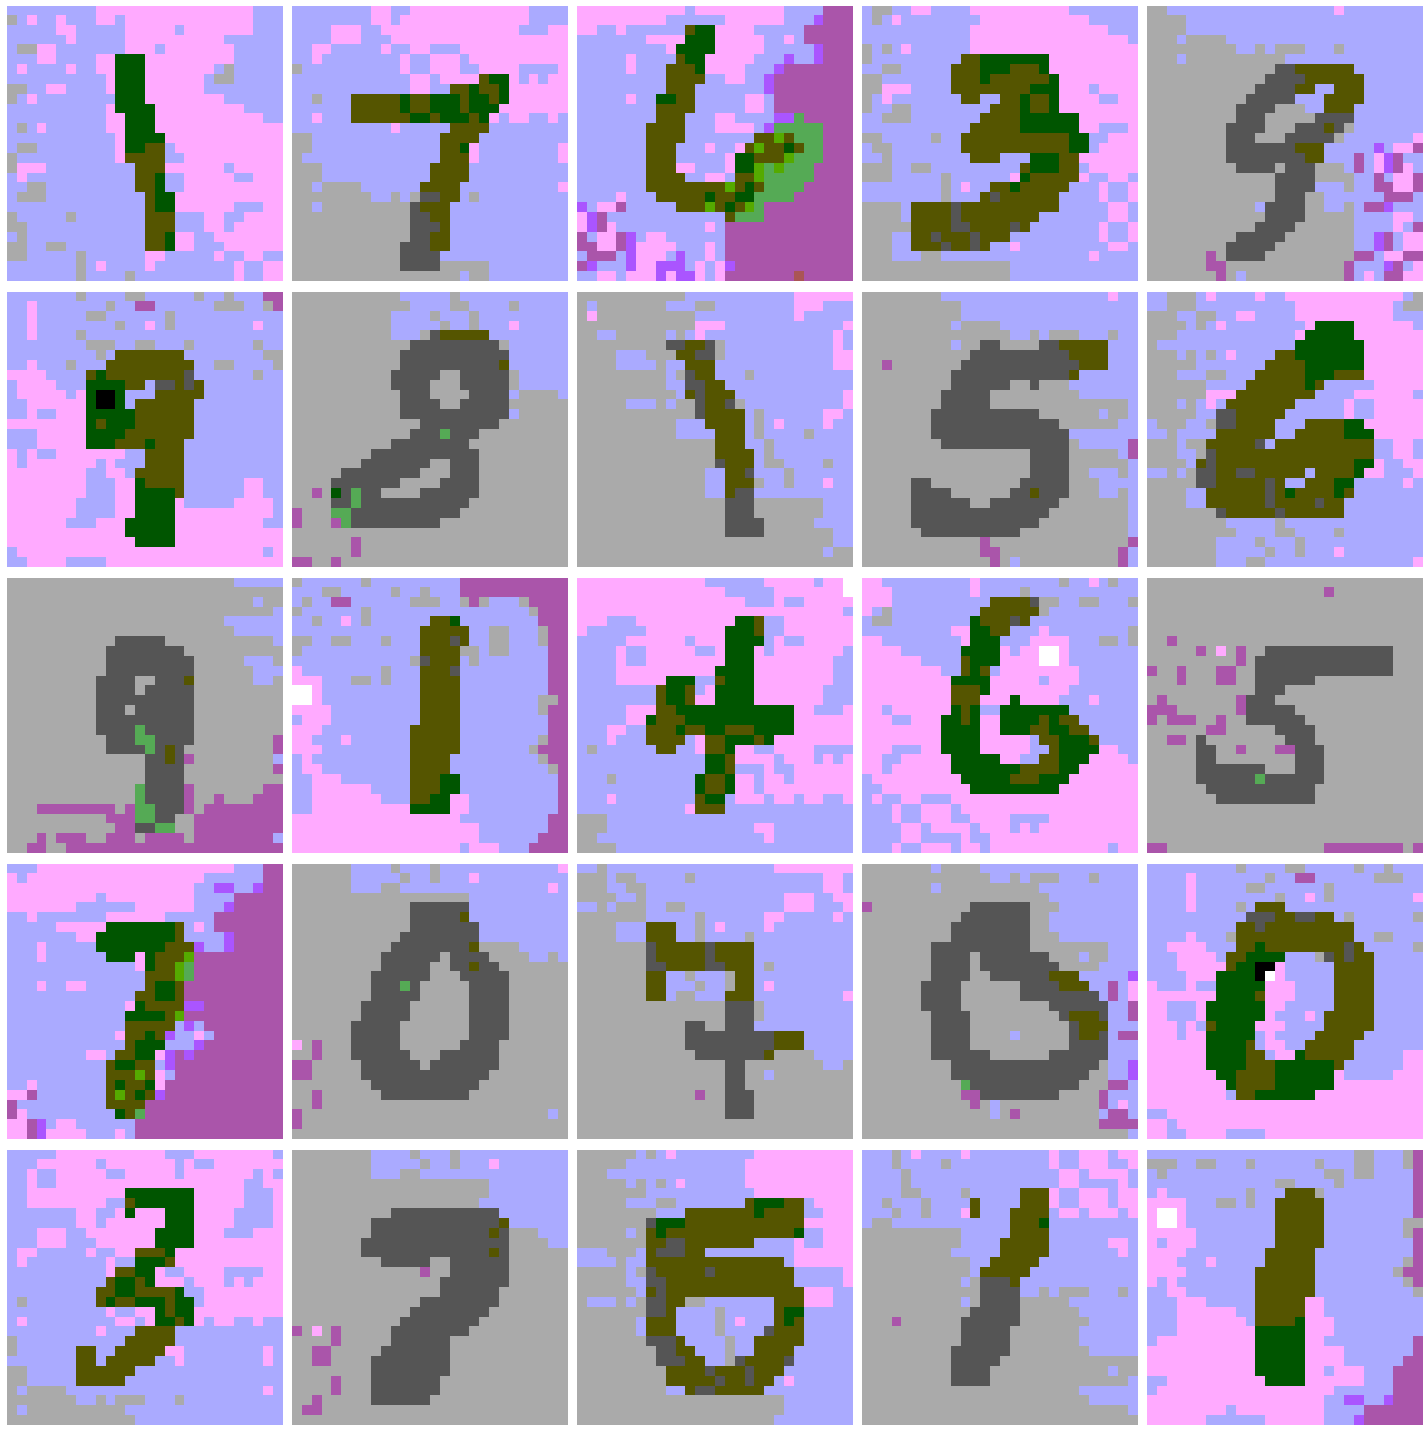

In [5]:
def scale_image(img):
    return (img / 3 * 255).astype(int)
with open('mnist-hw1.pkl', 'rb') as f:
    data = pickle.load(f)
train_data = data['train']
test_data = data['test']

grid_len = 5
fig1, axes = plt.subplots(grid_len, grid_len, figsize=(20,20))
rng = np.random.RandomState(seed=23)
for ax in axes.flat:
    ax.imshow(scale_image(train_data[rng.randint(len(train_data))]))
    ax.axis('off')
fig1.tight_layout()

fig2, axes = plt.subplots(grid_len, grid_len, figsize=(20,20))
rng = np.random.RandomState(seed=123)
for ax in axes.flat:
    ax.imshow(scale_image(test_data[rng.randint(len(test_data))]))
    ax.axis('off')
fig2.tight_layout()


Not all available colors are used:


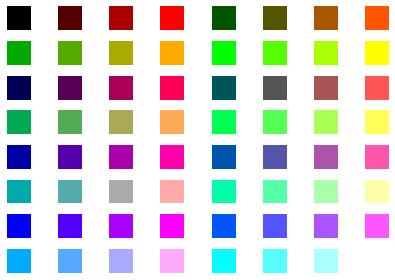

In [4]:
fig0, axes = plt.subplots(8, 8)
colors = np.arange(4)
i = 0
for r in colors:
    for g in colors:
        for b in colors:
            rgb_img = np.tile(np.array([r, g, b])[None, None, :], (2, 2, 1))
            axes.flat[i].imshow(scale_image(rgb_img))
            axes.flat[i].axis('off')
            i += 1
fig0.tight_layout()


# Load a trained model



In [4]:
import os

c = Config()
c.batch_size = 128
c.n_epochs = 50
c.learning_rate = 0.001
if torch.cuda.is_available():
    c.use_cuda = True
else:
    c.use_cuda = False
c.rnd_seed = 1
c.log_interval = 100
c.do_load_checkpoint=True
last_experiment = './experiment_dir/' + sorted([d for d in os.listdir('experiment_dir/') if 'colored' in str(d)], reverse=True)[0]

print(last_experiment)
exp_resume = coloredMNISTexperiment(config=c, name='resume_experiment', n_epochs=c.n_epochs,
                             seed=42, base_dir='./experiment_dir', 
                             resume=last_experiment, resume_save_types=('model',
                                                                         'simple',
                                                                         'th_vars',
                                                                         'results'), loggers={"visdom":"visdom"})
	

./experiment_dir/20190731-175115_coloredMNIST


In [5]:
exp_resume.setup()
exp_resume._setup_internal()


Config:
{
    "base_dir": "./experiment_dir",
    "batch_size": 128,
    "do_load_checkpoint": true,
    "learning_rate": 0.001,
    "log_interval": 100,
    "n_epochs": 50,
    "name": "coloredMNIST",
    "rnd_seed": 1,
    "seed": 1,
    "use_cuda": true
}
Experiment set up.
Loaded existing config from: ./experiment_dir/20190731-175115_coloredMNIST
Loaded existing checkpoint from: ./experiment_dir/20190731-175115_coloredMNIST/checkpoint/checkpoint_current.pth.tar


INFO:default-IMbHarYjSr:Config:
INFO:default-IMbHarYjSr:{
    "base_dir": "./experiment_dir",
    "batch_size": 128,
    "do_load_checkpoint": true,
    "learning_rate": 0.001,
    "log_interval": 100,
    "n_epochs": 50,
    "name": "coloredMNIST",
    "rnd_seed": 1,
    "seed": 1,
    "use_cuda": true
}
INFO:default-IMbHarYjSr:Experiment set up.
INFO:default-IMbHarYjSr:Loaded existing config from: ./experiment_dir/20190731-175115_coloredMNIST
INFO:default-IMbHarYjSr:Loaded existing checkpoint from: ./experiment_dir/20190731-175115_coloredMNIST/checkpoint/checkpoint_current.pth.tar


# Sampling properties


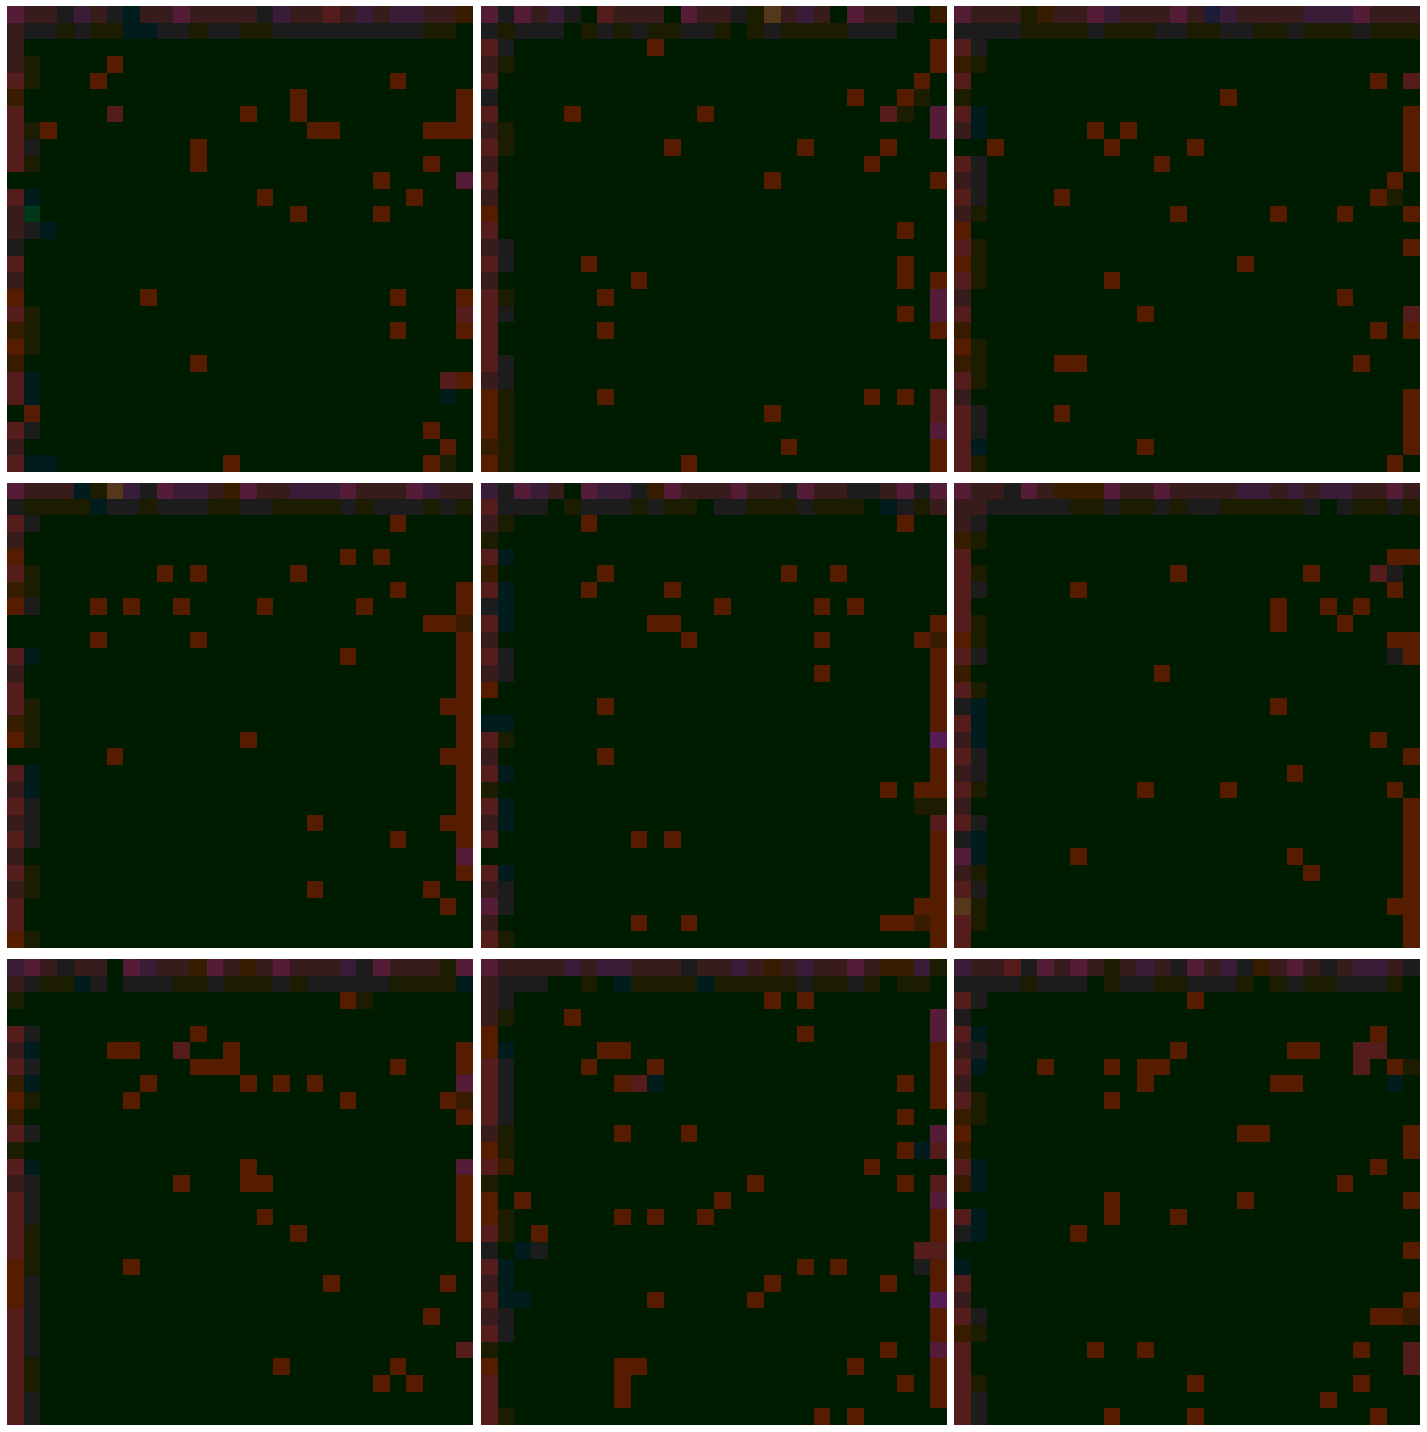

In [6]:
samples = np.transpose(exp_resume.model.sample(9, (28, 28), device=exp_resume.device), (0, 2, 3, 1))

grid_len = 3
fig1, axes = plt.subplots(grid_len, grid_len, figsize=(20,20))
i = 0
for ax in axes.flat:
    if i >= len(samples):
        break
    ax.imshow(scale_image(samples[i]))
    ax.axis('off')
    i += 1
fig1.tight_layout()



In [8]:
samples.max()


1.0